## 1. Importing the Libraries

In [67]:
import eda_helper_functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline


In [68]:
#pip install wordcloud

## 2. READ THE TRAINING dATA

In [69]:
file_path = r"C:\Users\jaragst\OneDrive - Pella Corporation\ML\Flight-Prediction-Sagemaker\data\train.csv"

In [70]:
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-04-01,Delhi,Cochin,06:50:00,12:10:00,320,1.0,No Info,5298
1,Jet Airways,2019-05-27,Delhi,Cochin,15:00:00,04:25:00,805,1.0,In-flight meal not included,12898
2,Air India,2019-03-01,Banglore,New Delhi,11:05:00,22:45:00,700,1.0,No Info,14069
3,Jet Airways,2019-05-24,Kolkata,Banglore,18:55:00,19:50:00,1495,1.0,In-flight meal not included,10844
4,Jet Airways,2019-04-01,Delhi,Cochin,16:00:00,12:35:00,1235,1.0,In-flight meal not included,5406
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-05-21,Kolkata,Banglore,06:30:00,19:50:00,800,1.0,No Info,14781
636,Air India,2019-06-12,Delhi,Cochin,17:20:00,09:25:00,965,1.0,No Info,7480
637,Jet Airways,2019-06-21,Banglore,Delhi,19:50:00,22:50:00,180,0.0,In-flight meal not included,7754
638,Jet Airways,2019-05-09,Kolkata,Banglore,14:05:00,04:40:00,875,1.0,No Info,13941


In [71]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [72]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], format='mixed',dayfirst=True) 
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})


In [73]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [74]:
train.describe(include = "number")

,duration,total_stops,price
count,640.000000,640.000000,640.00000
mean,655.445312,0.850000,9360.88125
std,501.997494,0.663844,4647.44457
min,80.000000,0.000000,1965.00000
25%,175.000000,0.000000,5741.00000
50%,552.500000,1.000000,8535.00000
75%,940.000000,1.000000,12683.75000
max,2315.000000,3.000000,36235.00000


In [75]:
(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,3
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,256,268,268,347.0,498


## 4. High Level Analysis of Missing Values

In [76]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


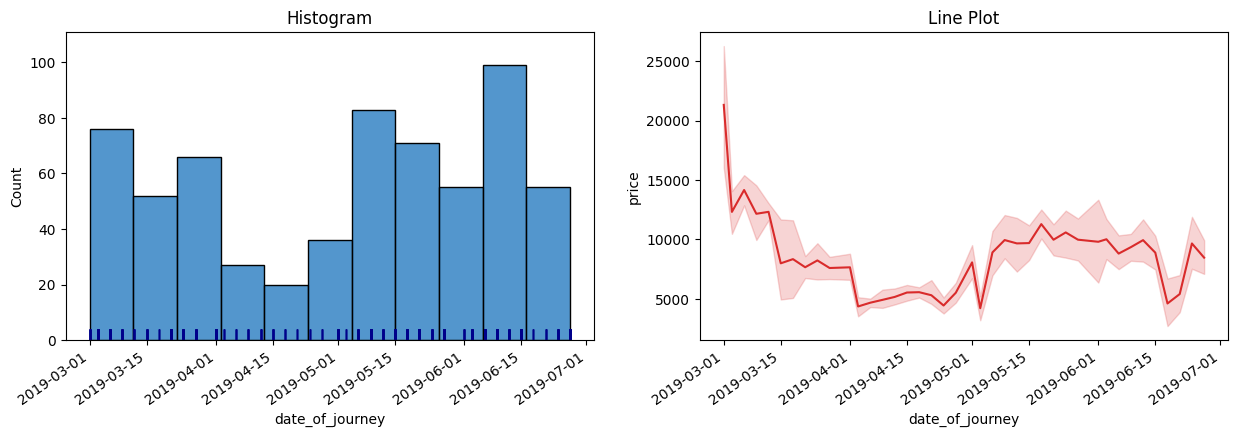

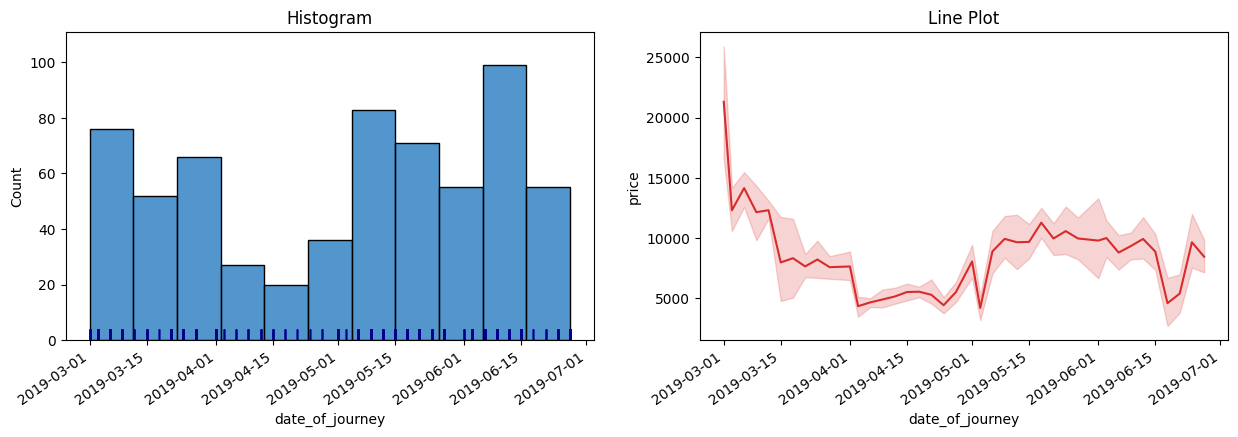

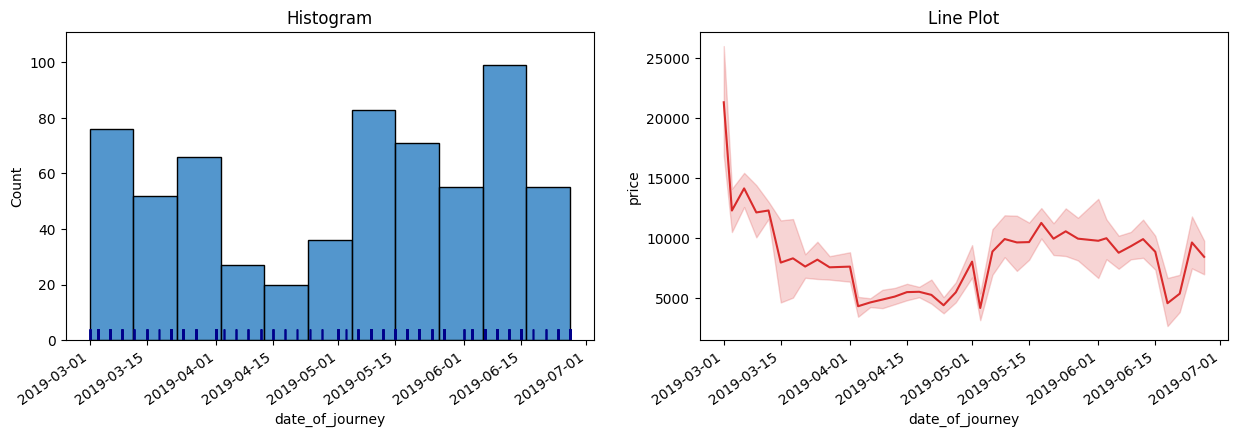

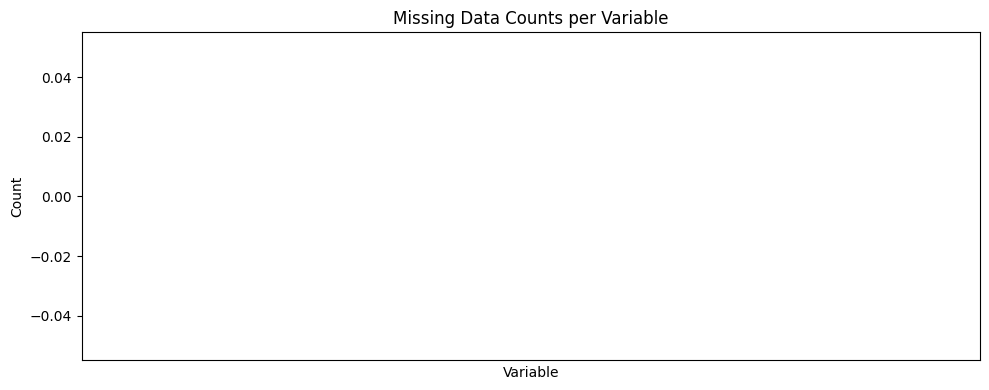

In [77]:
eda_helper_functions.plot_missing_info(train)

In [78]:
#pip install missingno

In [79]:
msno.matrix(train.sample(250))

<Axes: >

In [80]:
msno.bar(train.sample(250))

<Axes: >

In [81]:
msno.heatmap(train)

<Axes: >

## 5. High level Analysis of Outlier

In [82]:
from sklearn.ensemble import IsolationForest
forest = IsolationForest(n_estimators=10,random_state =42)

In [83]:
(
    train
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns = "price")
                                         .select_dtypes(include="number")))
    .query("outlier == -1")
    #.duration
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
3,Jet Airways,2019-05-24,Kolkata,Banglore,2024-07-26 18:55:00,2024-07-26 19:50:00,1495,1.0,In-flight meal not included,10844,-1
4,Jet Airways,2019-04-01,Delhi,Cochin,2024-07-26 16:00:00,2024-07-26 12:35:00,1235,1.0,In-flight meal not included,5406,-1
6,Jet Airways,2019-04-03,Delhi,Cochin,2024-07-26 14:00:00,2024-07-26 12:35:00,1355,1.0,In-flight meal not included,5177,-1
10,Jet Airways,2019-06-27,Delhi,Cochin,2024-07-26 05:30:00,2024-07-26 12:35:00,425,2.0,No Info,14441,-1
11,Spicejet,2019-04-12,Kolkata,Banglore,2024-07-26 17:10:00,2024-07-26 19:40:00,150,0.0,No Info,3873,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Jet Airways,2019-06-09,Kolkata,Banglore,2024-07-26 20:25:00,2024-07-26 21:05:00,1480,1.0,No Info,12692,-1
628,Jet Airways,2019-05-18,Kolkata,Banglore,2024-07-26 20:00:00,2024-07-26 18:15:00,1335,1.0,In-flight meal not included,10844,-1
629,Jet Airways,2019-06-15,Delhi,Cochin,2024-07-26 05:30:00,2024-07-26 19:00:00,810,2.0,In-flight meal not included,11507,-1
634,Air India,2019-05-01,Kolkata,Banglore,2024-07-26 14:15:00,2024-07-26 16:45:00,150,0.0,No Info,6245,-1


## 6. Pair Plots 

In [84]:
eda_helper_functions.pair_plots(train)

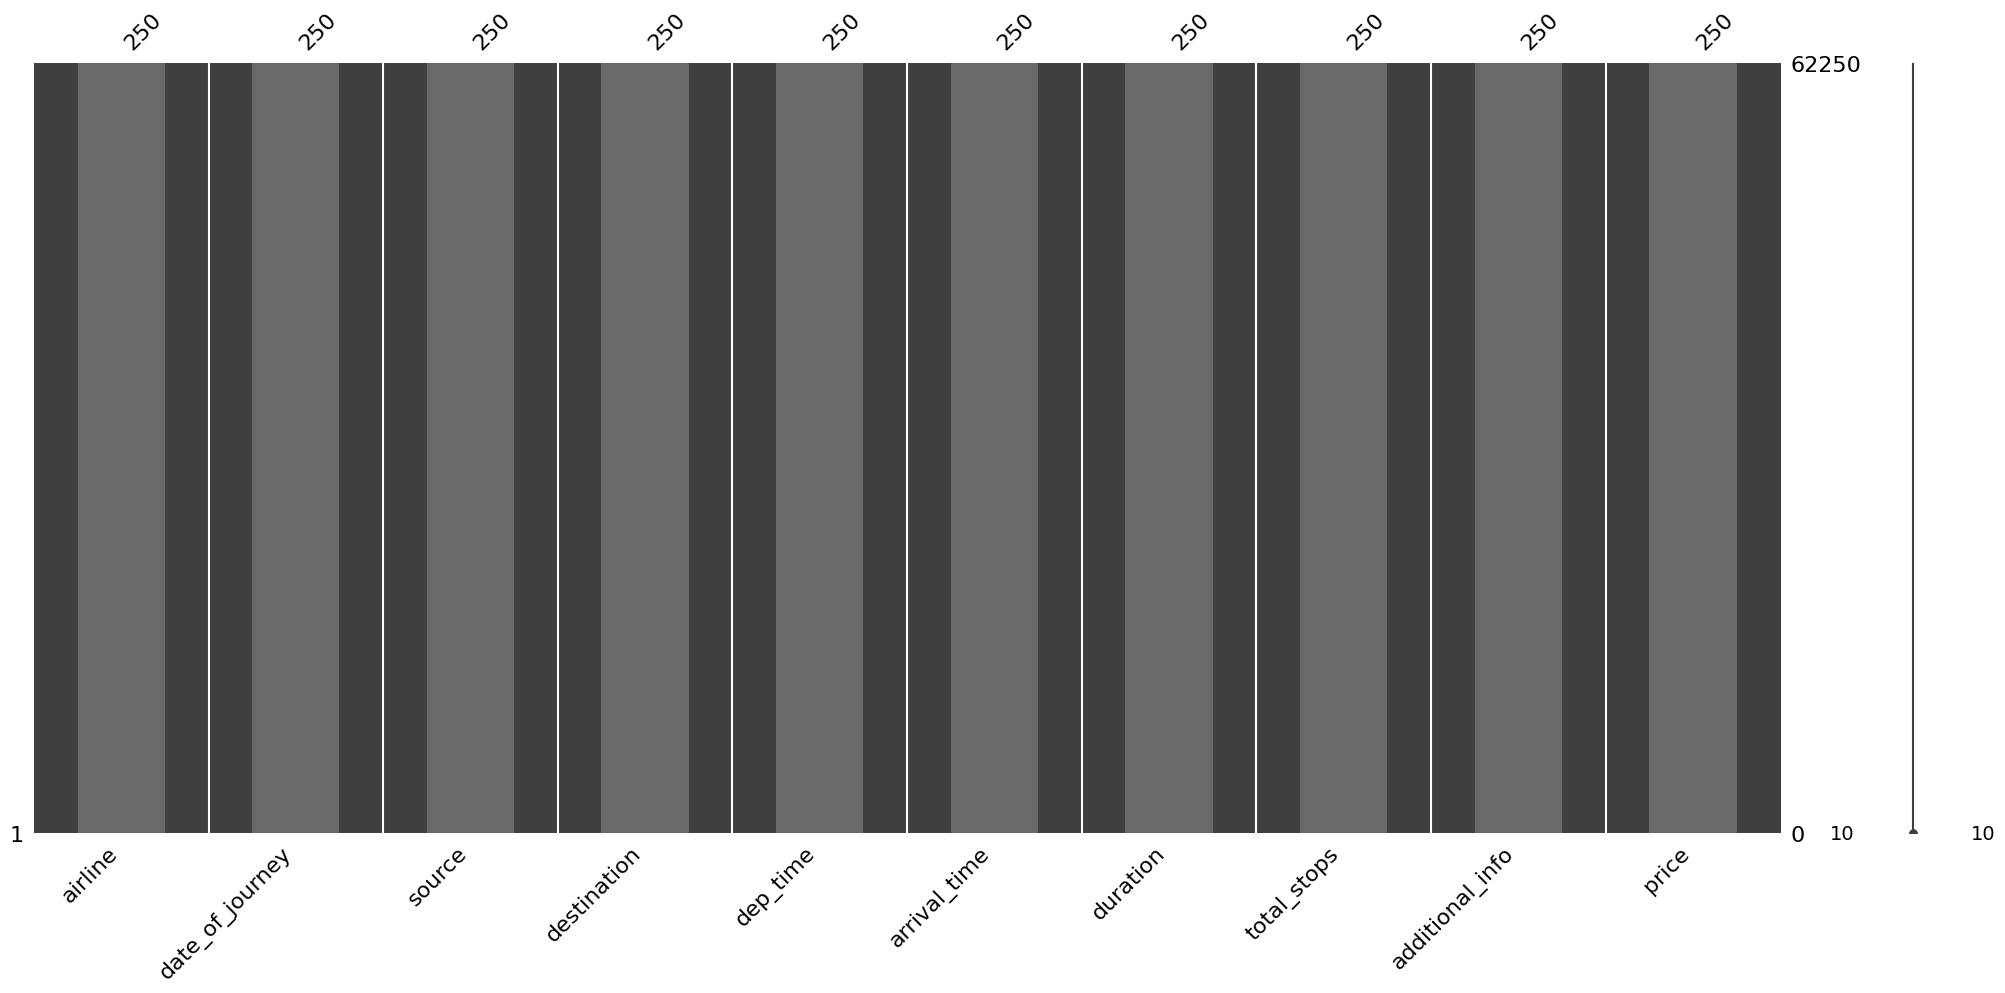

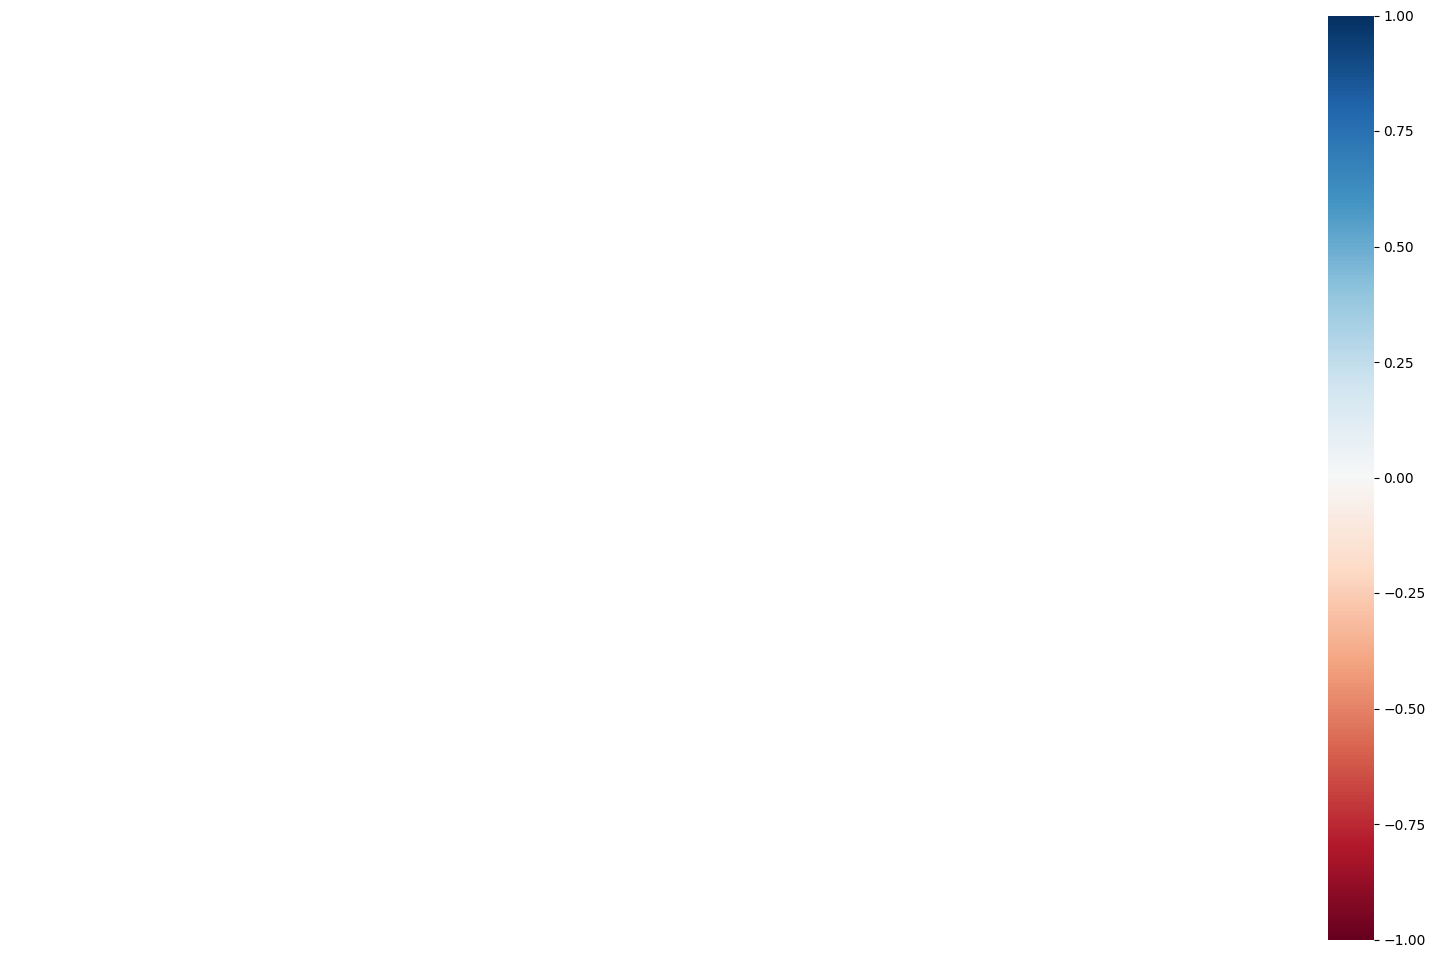

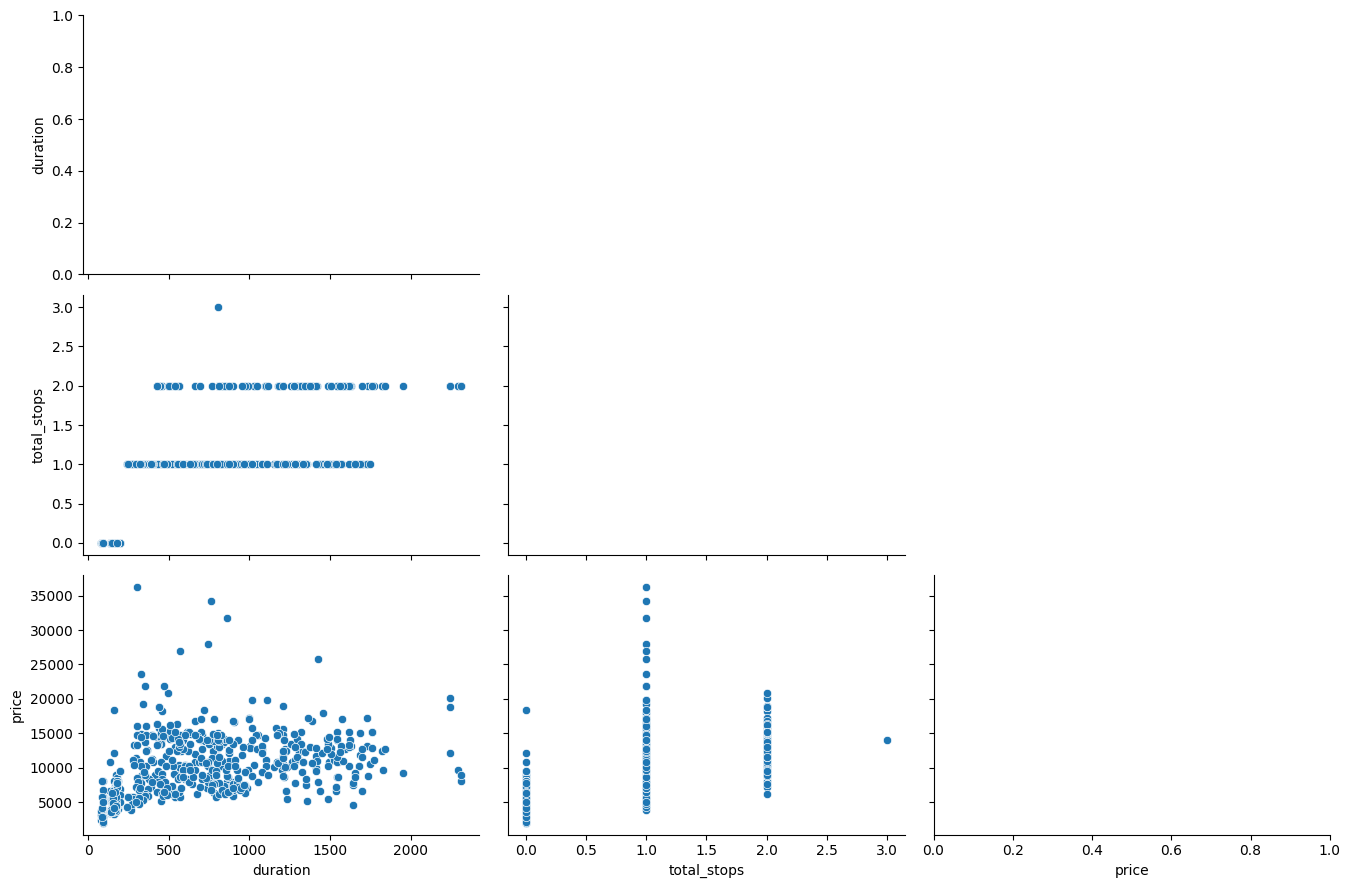

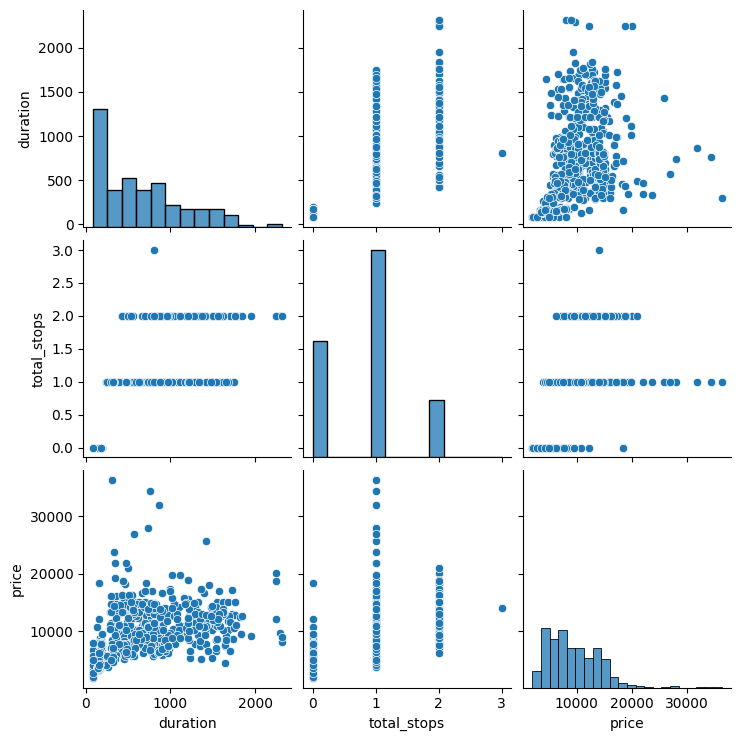

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

def pair_plots(df):
    # Create pair plots for the given DataFrame
    sns.pairplot(df)
    plt.show()

# Assuming you have already loaded the 'train' DataFrame
pair_plots(train)

## 7 . Correlation Analysis 

In [86]:
eda_helper_functions.correlation_heatmap(train)

In [87]:
train.corr(method="spearman",numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.789452,0.638439
total_stops,0.789452,1.000000,0.689980
price,0.638439,0.689980,1.000000


In [88]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis 

In [89]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline 

In [90]:
import eda_helper_functions

In [91]:
eda_helper_functions.cat_summary(train,"airline")

0           Indigo
1      Jet Airways
2        Air India
3      Jet Airways
4      Jet Airways
          ...     
635    Jet Airways
636      Air India
637    Jet Airways
638    Jet Airways
639    Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,256


,count,percentage
category,,
Jet Airways,256,0.400000
Indigo,114,0.178125
Air India,109,0.170313
Multiple Carriers,73,0.114062
Spicejet,42,0.065625
Air Asia,19,0.029687
Vistara,18,0.028125
Goair,9,0.014063


In [92]:
train.airline

0           Indigo
1      Jet Airways
2        Air India
3      Jet Airways
4      Jet Airways
          ...     
635    Jet Airways
636      Air India
637    Jet Airways
638    Jet Airways
639    Jet Airways
Name: airline, Length: 640, dtype: object

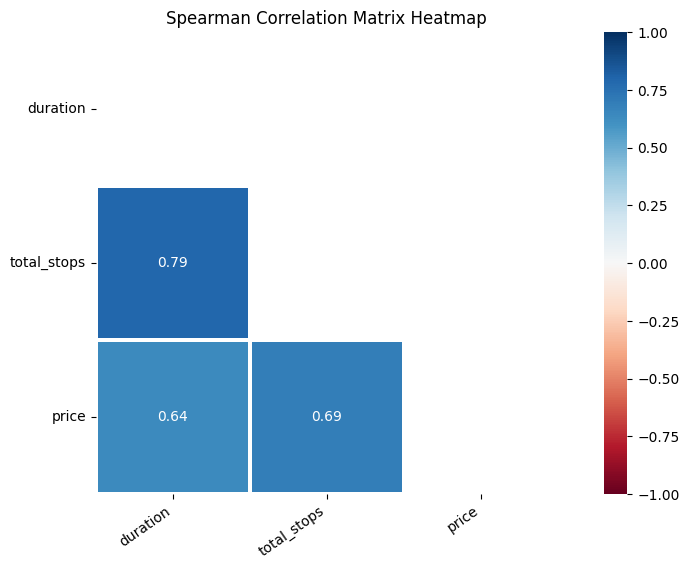

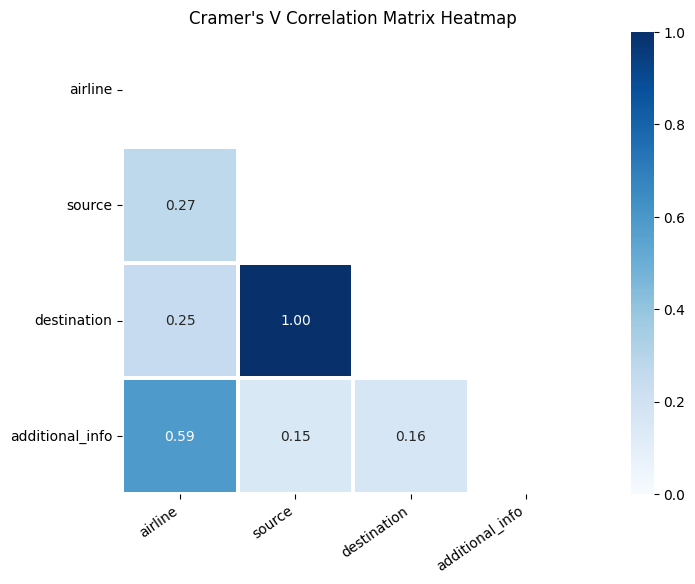

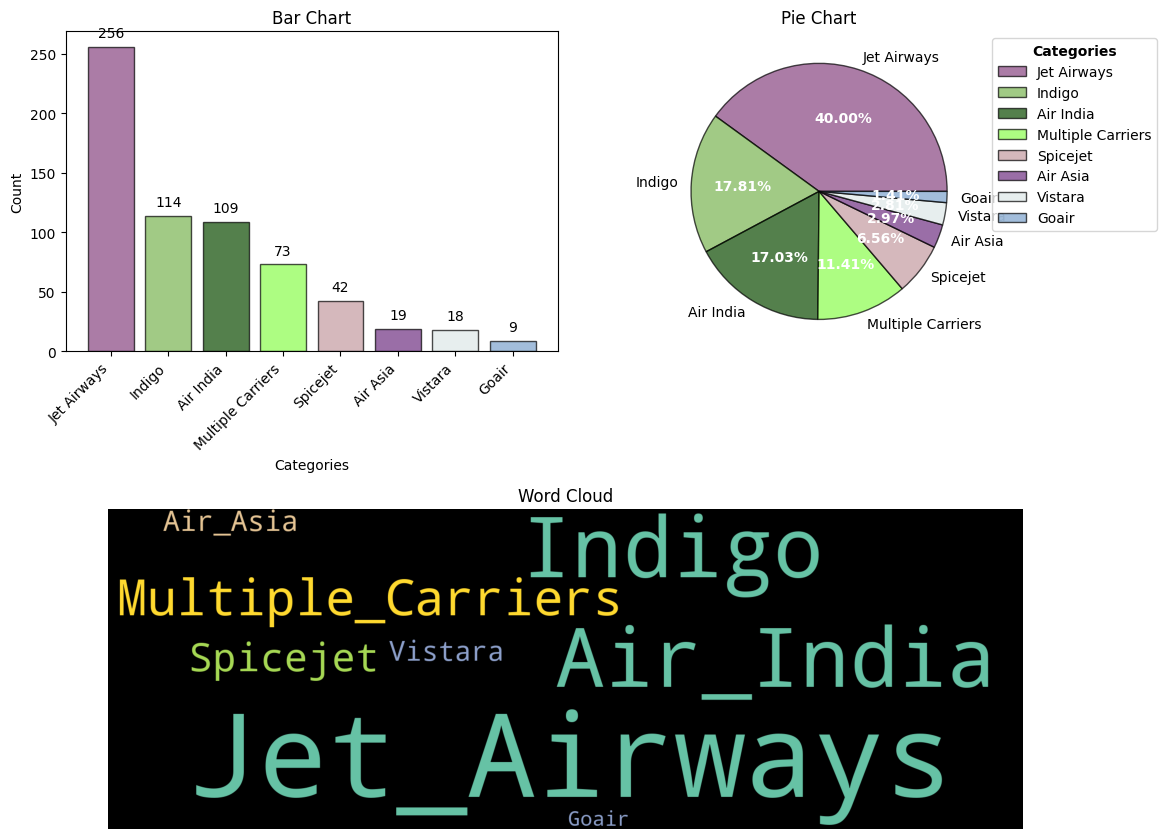

In [93]:
eda_helper_functions.cat_univar_plots(train,"airline")

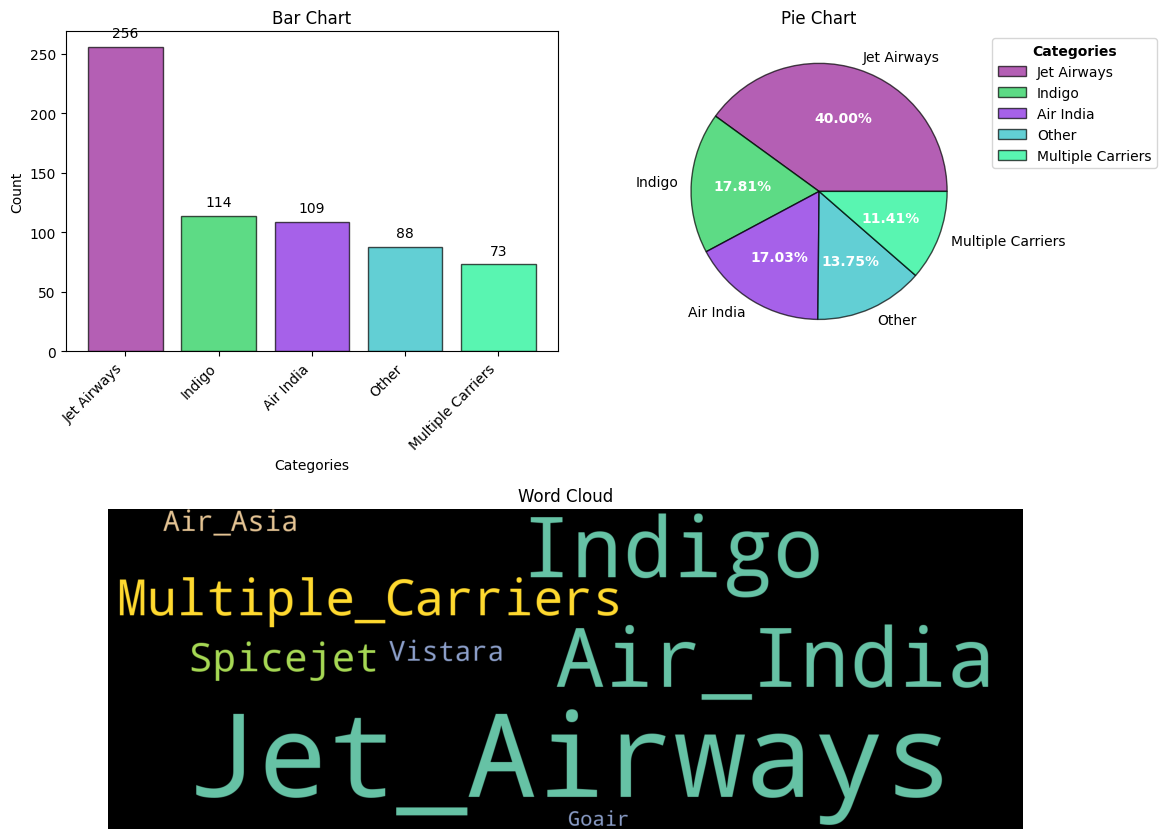

In [94]:
eda_helper_functions.cat_univar_plots(train,"airline",k=4)

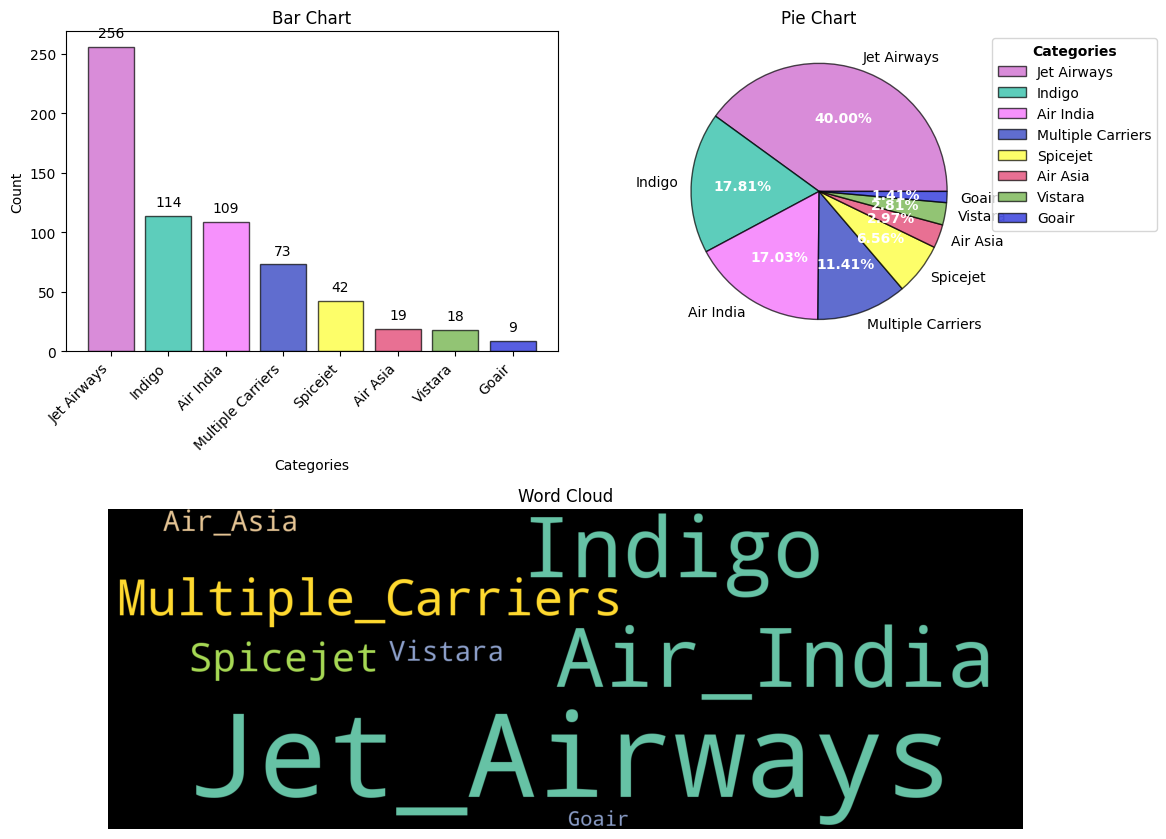

In [95]:
eda_helper_functions.cat_univar_plots(train,"airline")

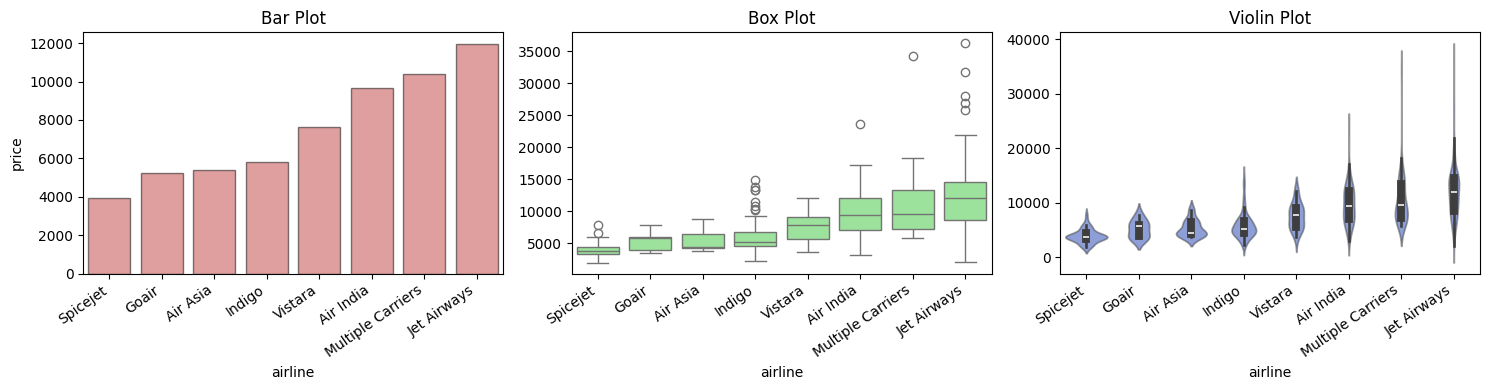

In [96]:
eda_helper_functions.num_cat_bivar_plots(data = train,num_var = "price" ,cat_var = "airline" )

In [97]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 51.22033524422821
- p-value              : 9.269646165734719e-58
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 295.838624504587
- p-value              : 4.680551917401482e-60
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


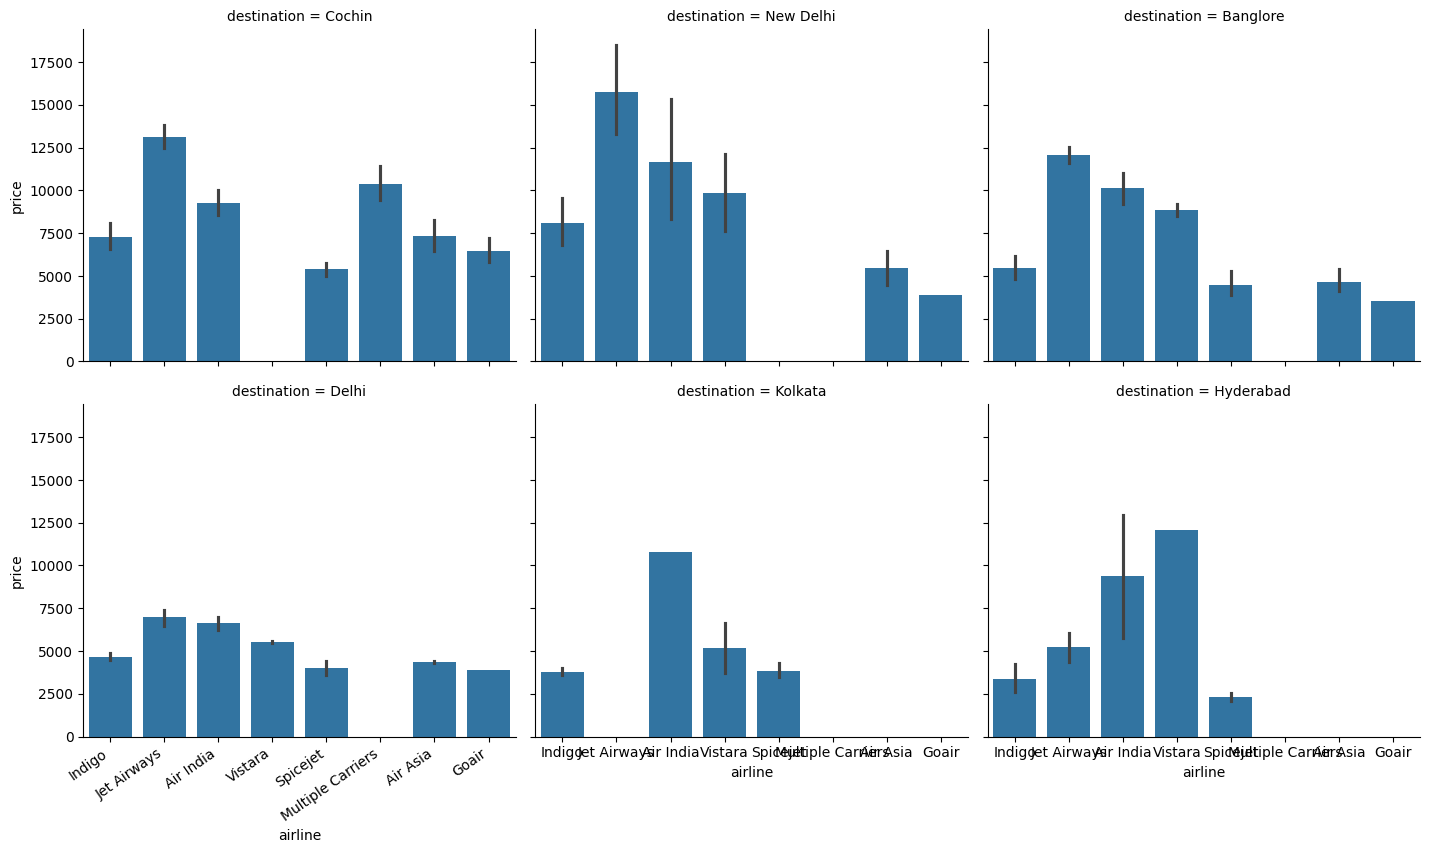

In [98]:
airline_grid = sns.FacetGrid(
    data = train,
    col = "destination",
    height =4,
    aspect = 1.2,
    col_wrap =3,
    sharey = True    
)
airline_grid.map(sns.barplot,"airline","price",order = train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)
    plt.show()
    

### 8.2 Date of Journey

In [99]:
train.date_of_journey

0     2019-04-01
1     2019-05-27
2     2019-03-01
3     2019-05-24
4     2019-04-01
         ...    
635   2019-05-21
636   2019-06-12
637   2019-06-21
638   2019-05-09
639   2019-06-27
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

In [104]:
eda_helper_functions.dt_univar_plots(
    data= train,
    var = "date_of_journey",
    target = "price"
)

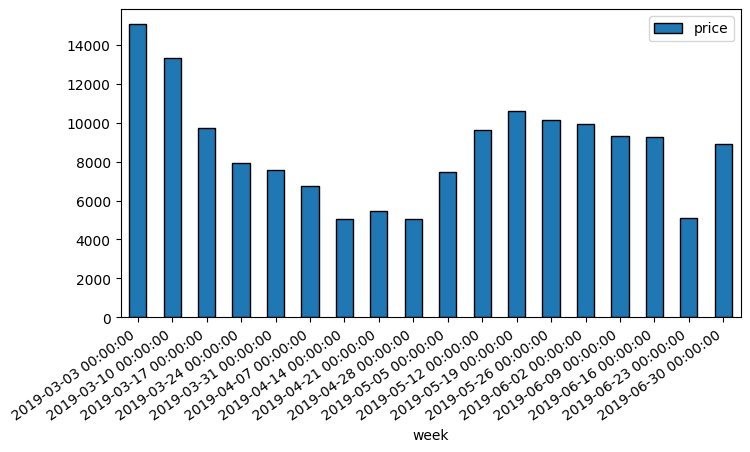

In [116]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey",freq="W"))
    .price.mean()
    .to_frame()
    #.set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index ="week")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
        
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)
plt.show()



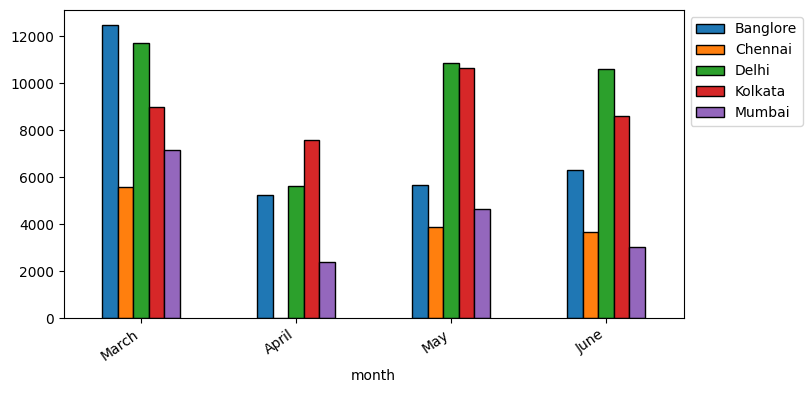

In [132]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind ="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)
ax = plt.gca()
ax.legend(loc="upper left",
          bbox_to_anchor=(1,1))
eda_helper_functions.rotate_xlabels(ax)
plt.show()


### 8.3 Dep Time 

In [134]:
train.dep_time

0     2024-07-26 06:50:00
1     2024-07-26 15:00:00
2     2024-07-26 11:05:00
3     2024-07-26 18:55:00
4     2024-07-26 16:00:00
              ...        
635   2024-07-26 06:30:00
636   2024-07-26 17:20:00
637   2024-07-26 19:50:00
638   2024-07-26 14:05:00
639   2024-07-26 10:20:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

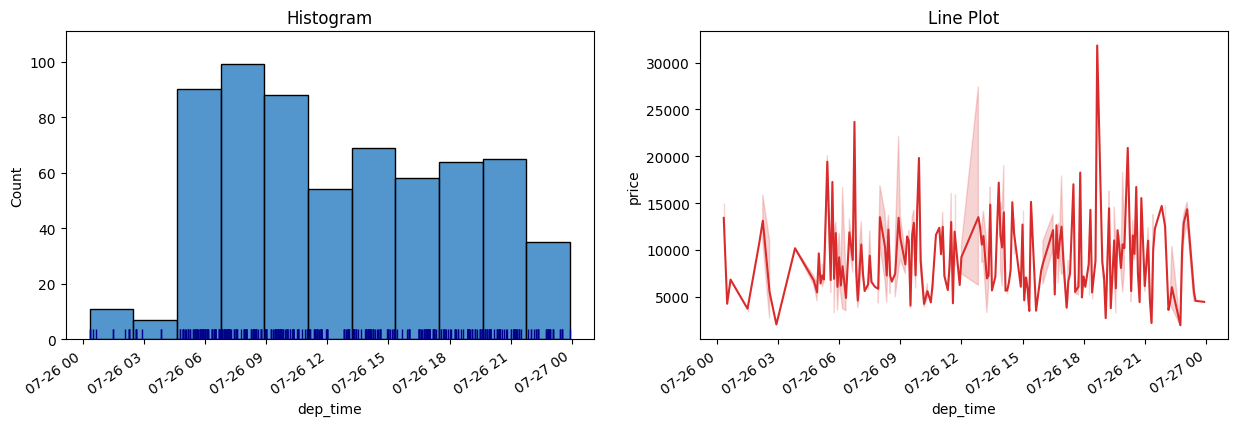

In [137]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")
plt.show()

In [146]:
(
    train
    .dep_time
    .dt.hour
    .pipe(lambda ser :pd.Series(np.select([ser.between(4,12,inclusive="left"),
                                 ser.between(12,16,inclusive="left"),
                                 ser.between(16,20,inclusive="left")],
                                ["morning",
                                 "afternoon",
                                 "evening"],
                                default="night")))

)
    

0        morning
1      afternoon
2        morning
3        evening
4        evening
         ...    
635      morning
636      evening
637      evening
638    afternoon
639      morning
Length: 640, dtype: object

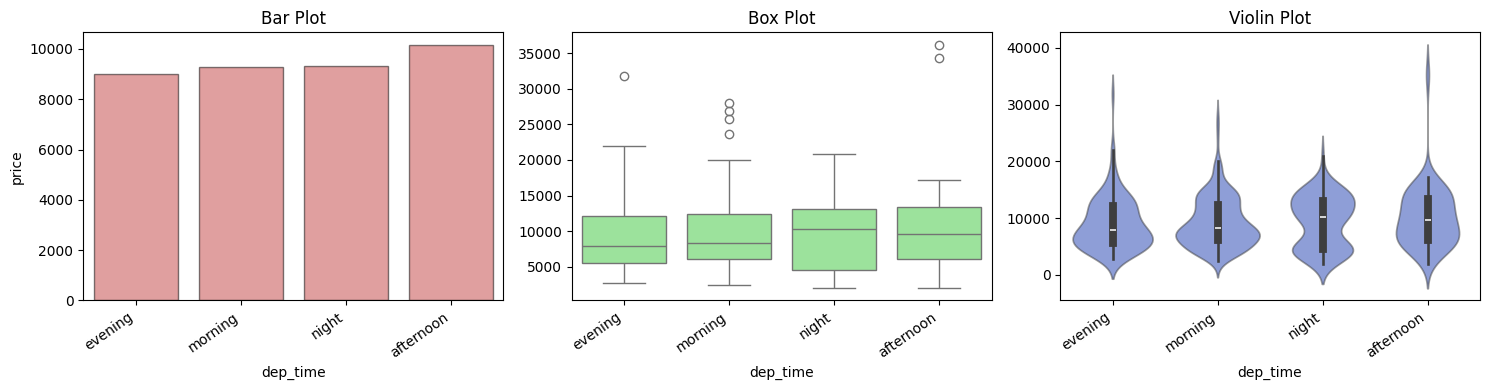

In [156]:
(
    train
    .assign(dep_time=lambda df_:(
      np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                ["morning","afternoon","evening"],
                                default="night"))
           

)
   #.pipe(eda_helper_functions.cat_univar_plots,"dep_time") 
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time") 
)



### 8.4 duration

In [160]:
train.duration

0       320
1       805
2       700
3      1495
4      1235
       ... 
635     800
636     965
637     180
638     875
639      90
Name: duration, Length: 640, dtype: int64

In [162]:
eda_helper_functions.num_summary(train ,"duration")

0       320
1       805
2       700
3      1495
4      1235
       ... 
635     800
636     965
637     180
638     875
639      90
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,80.00
5,90.00
10,150.00
25,175.00
50,552.50
75,940.00
90,1441.00
95,1620.25
99,1907.10


,value
mean,655.445312
trimmed mean (5%),621.979167
trimmed mean (10%),595.000000
median,552.500000


,value
var,252001.483703
std,501.997494
IQR,765.000000
mad,377.500000
coef_variance,0.765888


,value
skewness,0.858944
kurtosis,-0.018146


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.8138437684951196e-20
Test Statistic       : 0.8997091299356025
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 19.515151078929534
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [167]:
train.duration.quantile([.25,0.5,0.75])

0.25    175.0
0.50    552.5
0.75    940.0
Name: duration, dtype: float64

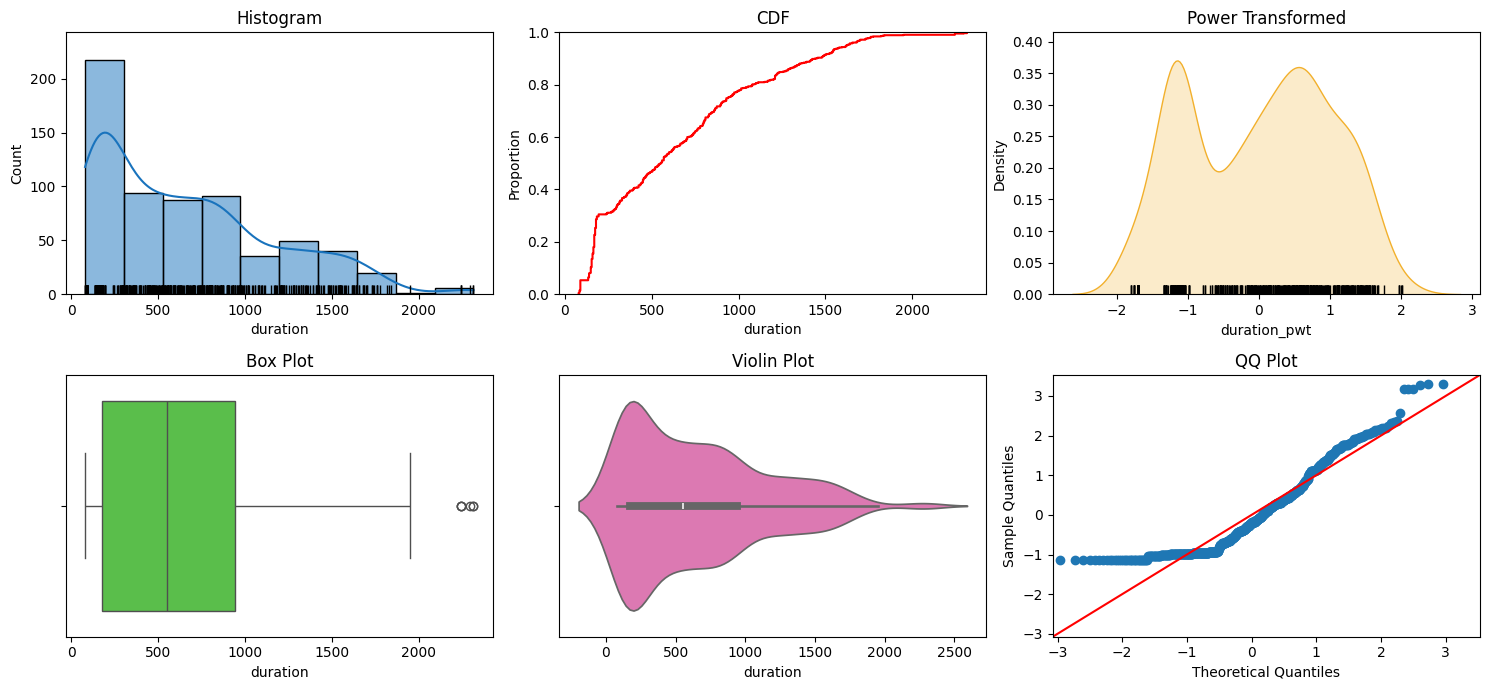

In [170]:
eda_helper_functions.num_univar_plots(train,"duration")

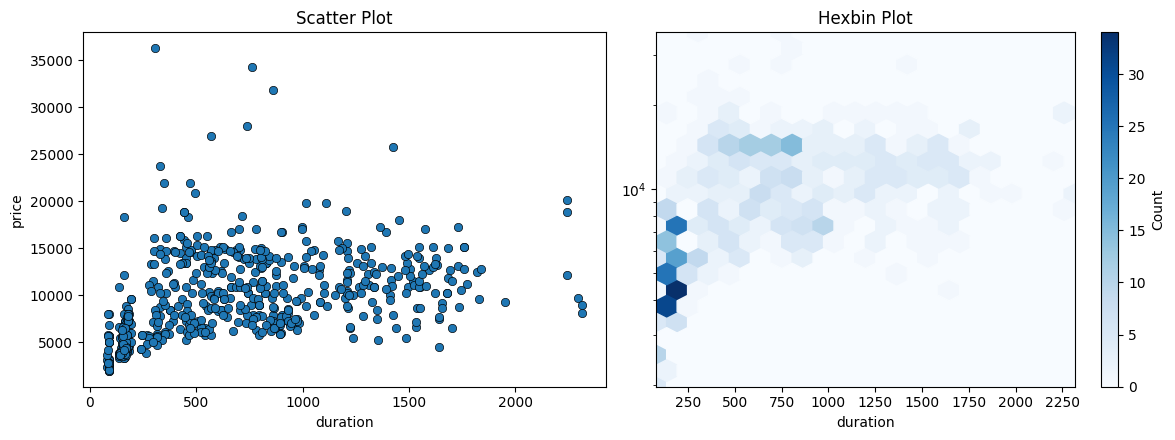

In [175]:
eda_helper_functions.num_bivar_plots(train,
                                     "duration",
                                     "price",
                                     hexbin_kwargs=dict(
                                         yscale="log",
                                         gridsize=20,
                                         cmap="Blues"
                                     )
                                    )

In [177]:
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.45563379939310455
- p-value              : 3.991152691679111e-34
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6384388736397482
- p-value              : 1.4337692727030962e-74
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


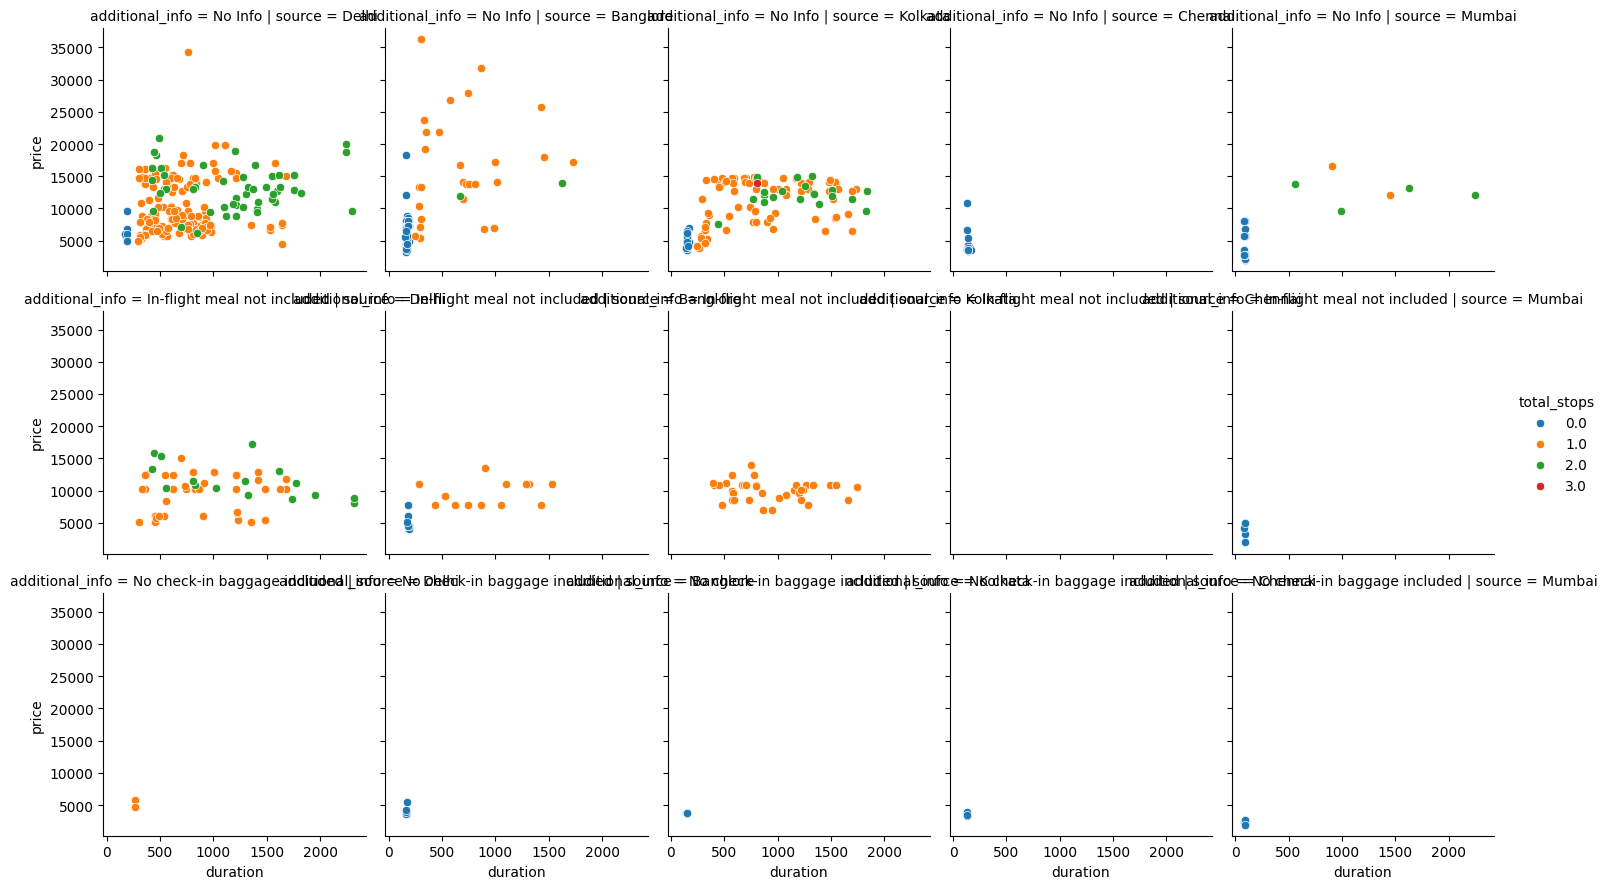

In [186]:
# 5 dimentional lot
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    row="additional_info",
    hue ="total_stops",
    sharey=True
)
duration_grid.map(sns.scatterplot,"duration","price")
duration_grid.add_legend()
plt.show()

## 9 . Automated EDA

- Pandas Profiling.
- Sweetviz
- Autoviz
- D-Tale


In [201]:
from ydata_profiling import ProfileReport


In [190]:
#pip install ydata-profiling

In [202]:
profile = ProfileReport(train, title="Profiling Report")

In [204]:
profile.to_file(output_file = "output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]